![](http://5b0988e595225.cdn.sohucs.com/images/20170830/ec8e17f92a0347db83d46cb1846d7e89.jpeg)

## 泰坦尼克号存活率数据分析

数据来源于[Kaggle2](https://www.kaggle.com/c/titanic/data)

本报告尝试分析泰坦尼克号数据，探索那些因素对幸存率有影响。


## 数据整理与分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei'] 
#用来正常显示负号
plt.rcParams['axes.unicode_minus']=False 

In [2]:
%matplotlib inline

In [3]:
titanic_df = pd.read_csv('titanic-data.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


数据概况：

* PassengerId - 乘客序号

* Survived - 最终是否存活（1表示存活，0表示未存活）

* Pclass - 船舱等级（1是头等舱，3是最低等）

* Name - 乘客姓名

* Sex - 性别

* Age - 年龄

* Parch - 一同上船的父母或子女

* SibSp - 一同上船的兄弟姐妹或配偶

* Ticket - 船票号码

* Fare - 船票价格

* Cabin - 船舱号

* Embarked - 登船港口，主要是S（南安普顿）、C（瑟堡）、Q（皇后镇）

### 整体情况

In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


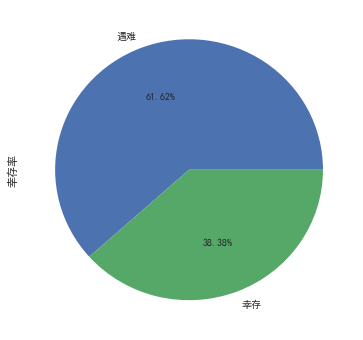

In [6]:
survived_group = titanic_df.groupby('Survived')['PassengerId'].count()
survived_group.name = u'幸存率'
survived_group.plot.pie(figsize=(6, 6), autopct='%.2f%%', labels=[u'遇难', u'幸存']);

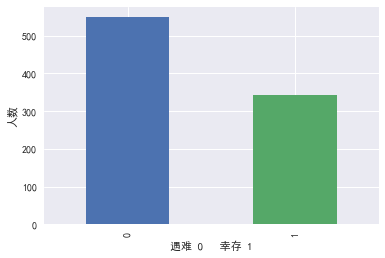

In [7]:
survived_group.plot.bar();
plt.xlabel(u'遇难 0   幸存 1')
plt.ylabel(u'人数')
plt.show()

通过上面分析可以看到幸存率约为 38.38%；平均年龄为 29 岁，同时 Age 有 NaN 数据。

In [8]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

查看缺失值情况得出：

1. Age 有 177 个遗漏信息

2. Cabin 有 687 个遗漏信息

3. Embarked 有 2 个遗漏信息

### 幸存率与 Pclass 的关系

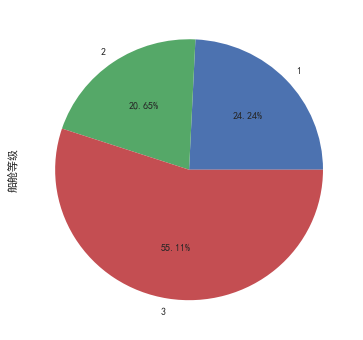

In [9]:
# 不同级别船舱等级 Pclass 的分布比例
pclass_group = titanic_df.groupby('Pclass')['PassengerId'].count()
pclass_group.name = u'船舱等级'
pclass_group.plot.pie(figsize=(6, 6), autopct='%.2f%%');

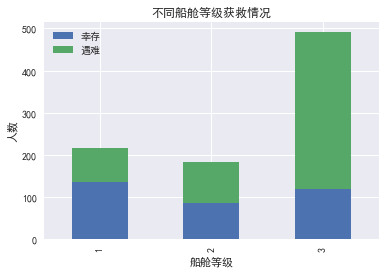

In [10]:
# 不同级别船舱等级 Pclass 的幸存和遇难情况
pclass_survived_0 = titanic_df.Pclass[titanic_df.Survived == 0].value_counts()
pclass_survived_1 = titanic_df.Pclass[titanic_df.Survived == 1].value_counts()

df = pd.DataFrame({u'幸存':pclass_survived_1, u'遇难':pclass_survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"不同船舱等级获救情况")
plt.xlabel(u'船舱等级') 
plt.ylabel(u'人数')
plt.show()

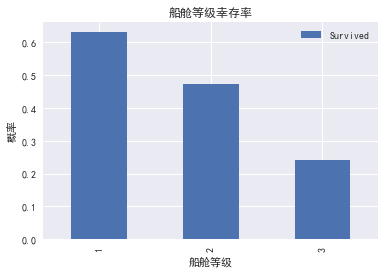

In [11]:
# 不同级别船舱等级 Pclass 的幸存概率
titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean().plot(kind='bar')
plt.title(u'船舱等级幸存率')
plt.xlabel(u'船舱等级')
plt.ylabel(u'概率')
plt.show()

从以上数据可以得出：

* 大多数人在低等级别船舱

* 低级别船舱遇难人数较多

* 高级别船舱幸存者概率大

### 幸存率与 Sex 的关系

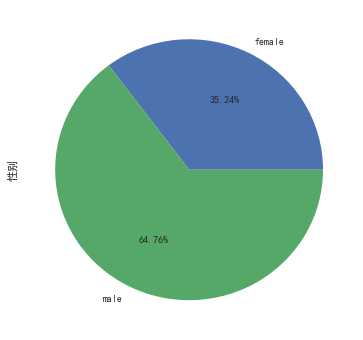

In [12]:
sex_group = titanic_df.groupby('Sex')['PassengerId'].count()
sex_group.name = u'性别'
sex_group.plot.pie(figsize=(6, 6), autopct='%.2f%%');

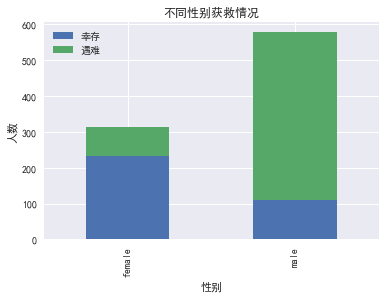

In [13]:
# 不同性别 Sex 的幸存和遇难情况
sex_survived_0 = titanic_df.Sex[titanic_df.Survived == 0].value_counts()
sex_survived_1 = titanic_df.Sex[titanic_df.Survived == 1].value_counts()

df = pd.DataFrame({u'幸存':sex_survived_1 ,u'遇难':sex_survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u'不同性别获救情况')
plt.xlabel(u'性别')
plt.ylabel(u'人数')
plt.show()

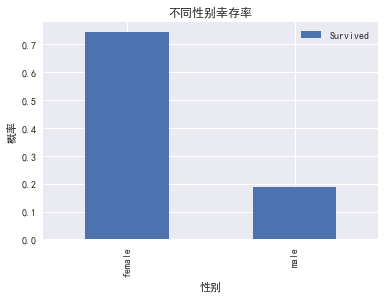

In [14]:
# 不同性别 Sex 的幸存概率
titanic_df[['Sex', 'Survived']].groupby('Sex').mean().plot(kind='bar')
plt.title(u'不同性别幸存率')
plt.xlabel(u'性别')
plt.ylabel(u'概率')
plt.show()

从数据很明显看出，女性获救的概率远大于男性

### 幸存率与 Age 的关系

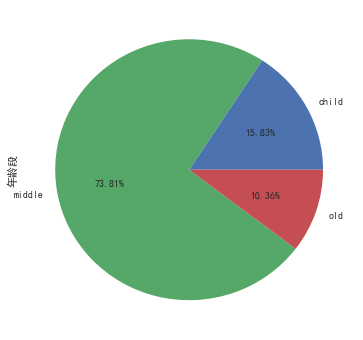

In [15]:
def getAgeGroup(age):
    if age < 18:
        return 'child'
    elif age < 50:
        return 'middle'
    else:
        return 'old'
    
titanic_df['AgeGroup'] = titanic_df['Age'].dropna().apply(getAgeGroup)
age_group = titanic_df.groupby('AgeGroup')['PassengerId'].count()
age_group.name = u'年龄段'
age_group.plot(kind='pie', figsize=(6, 6), autopct='%.2f%%');

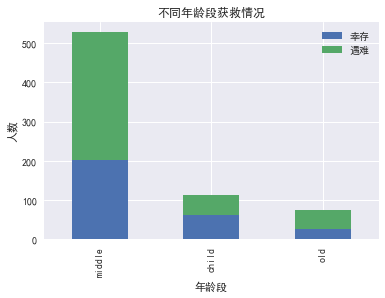

In [16]:
# 不同年龄段幸存和遇难情况
ageGroup_survived_0 = titanic_df.AgeGroup[titanic_df.Survived == 0].value_counts()
ageGroup_survived_1 = titanic_df.AgeGroup[titanic_df.Survived == 1].value_counts()

df = pd.DataFrame({u'幸存':ageGroup_survived_1 ,u'遇难':ageGroup_survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u'不同年龄段获救情况')
plt.xlabel(u'年龄段')
plt.ylabel(u'人数')
plt.show()

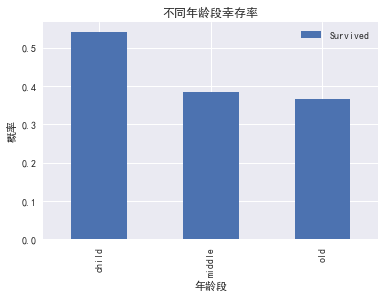

In [17]:
# 不同年龄段的幸存率
titanic_df[['AgeGroup', 'Survived']].groupby('AgeGroup').mean().plot(kind='bar')
plt.title(u'不同年龄段幸存率')
plt.xlabel(u'年龄段')
plt.ylabel(u'概率')
plt.show()

从过滤数据后的数据得出，小孩（年龄小于18岁）幸存率大于其他年龄段

## 结论

综上所述：

1. 泰坦尼克号整体的幸存率约为 38.38%

2. 存活率与 Pclass 的关系: 大多数人在低级别船舱，Pclass 等级越高（1最高），存活率越高

3. 存活率与 Sex 的关系: female 的存活率显著高于 male，女士优先。

4. 存活率与 Age 的关系：通过对年龄进行分段得出，小孩（年龄小于18岁）存活率要明显高于其他年龄段（其中年龄段数据丢失做了过滤操作，对整体结论有较小的影响）


## 参考

[pandas 0.19.2 documentation](http://www.usyiyi.cn/translate/Pandas_0j2/10min.html)

[kaggle Titanic](https://www.kaggle.com/c/titanic/data)

[pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

[matplotlib 中文乱码解决](https://www.zhihu.com/question/25404709)